In [308]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

from sklearn.metrics import confusion_matrix,precision_recall_curve,auc,roc_auc_score,roc_curve,recall_score,classification_report 
from sklearn.metrics import accuracy_score

In [309]:
df=pd.read_csv(r'C:\Users\dewat\OneDrive\Documents\Python for data analysis\SkillCraft1_Dataset.csv')
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019



Attribute Information:

1. GameID: Unique ID number for each game (integer)
2. LeagueIndex: Bronze, Silver, Gold, Platinum, Diamond, Master, GrandMaster, and Professional leagues coded 1-8 (Ordinal)
3. Age: Age of each player (integer)
4. HoursPerWeek: Reported hours spent playing per week (integer)
5. TotalHours: Reported total hours spent playing (integer)
6. APM: Action per minute (continuous)
7. SelectByHotkeys: Number of unit or building selections made using hotkeys per timestamp (continuous)
8. AssignToHotkeys: Number of units or buildings assigned to hotkeys per timestamp (continuous)
9. UniqueHotkeys: Number of unique hotkeys used per timestamp (continuous)
10. MinimapAttacks: Number of attack actions on minimap per timestamp (continuous)
11. MinimapRightClicks: number of right-clicks on minimap per timestamp (continuous)
12. NumberOfPACs: Number of PACs per timestamp (continuous)
13. GapBetweenPACs: Mean duration in milliseconds between PACs (continuous)
14. ActionLatency: Mean latency from the onset of a PACs to their first action in milliseconds (continuous)
15. ActionsInPAC: Mean number of actions within each PAC (continuous)
16. TotalMapExplored: The number of 24x24 game coordinate grids viewed by the player per timestamp (continuous)
17. WorkersMade: Number of SCVs, drones, and probes trained per timestamp (continuous)
18. UniqueUnitsMade: Unique unites made per timestamp (continuous)
19. ComplexUnitsMade: Number of ghosts, infestors, and high templars trained per timestamp (continuous)
20. ComplexAbilitiesUsed: Abilities requiring specific targeting instructions used per timestamp (continuous)

In [310]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3395 entries, 0 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3395 non-null   int64  
 1   LeagueIndex           3395 non-null   int64  
 2   Age                   3395 non-null   object 
 3   HoursPerWeek          3395 non-null   object 
 4   TotalHours            3395 non-null   object 
 5   APM                   3395 non-null   float64
 6   SelectByHotkeys       3395 non-null   float64
 7   AssignToHotkeys       3395 non-null   float64
 8   UniqueHotkeys         3395 non-null   int64  
 9   MinimapAttacks        3395 non-null   float64
 10  MinimapRightClicks    3395 non-null   float64
 11  NumberOfPACs          3395 non-null   float64
 12  GapBetweenPACs        3395 non-null   float64
 13  ActionLatency         3395 non-null   float64
 14  ActionsInPAC          3395 non-null   float64
 15  TotalMapExplored     

In [311]:
df["TotalHours"].unique()

array(['3000', '5000', '200', '400', '500', '70', '240', '10000', '2708',
       '800', '6000', '190', '350', '1000', '1500', '2000', '120', '1100',
       '2520', '700', '160', '150', '250', '730', '230', '300', '100',
       '270', '1200', '30', '600', '540', '280', '1600', '50', '140',
       '900', '550', '625', '1300', '450', '750', '612', '180', '770',
       '720', '415', '1800', '2200', '480', '430', '639', '360', '1250',
       '365', '650', '233', '416', '1825', '780', '1260', '315', '10',
       '312', '110', '1700', '92', '2500', '1400', '220', '999', '303',
       '96', '184', '4000', '420', '60', '2400', '2160', '80', '25',
       '624', '176', '?', '35', '1163', '333', '75', '7', '40', '325',
       '90', '175', '88', '850', '26', '1650', '465', '235', '1350',
       '460', '848', '256', '130', '1466', '670', '711', '1030', '1080',
       '1460', '1050', '20000', '582', '2800', '553', '1008', '330',
       '936', '243', '1320', '425', '1145', '366', '2700', '830', '3',
 

In [312]:
df[df["TotalHours"]=="?"].head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
358,1064,5,17,20,?,94.4724,0.003846,0.000783,3,0.000010,0.000135,0.004474,50.5455,54.9287,3.0972,31,0.000763,7,0.000106,0.000116
1841,5255,5,18,?,?,122.2470,0.006357,0.000433,3,0.000014,0.000257,0.003043,30.8929,62.2933,5.3822,23,0.001055,5,0.000000,0.000338
3340,10001,8,?,?,?,189.7404,0.004582,0.000655,4,0.000073,0.000618,0.006291,23.5130,32.5665,4.4451,25,0.002218,6,0.000000,0.000000
3341,10005,8,?,?,?,287.8128,0.029040,0.001041,9,0.000231,0.000656,0.005399,31.6416,36.1143,4.5893,34,0.001138,6,0.000058,0.000000
3342,10006,8,?,?,?,294.0996,0.029640,0.001076,6,0.000302,0.002374,0.006294,16.6393,36.8192,4.1850,26,0.000987,6,0.000000,0.000000


We see that "?" from Age,HoursPerWeeK and TotalHours are all on same rows in most of cases

In [313]:
df[df["TotalHours"]=="?"].groupby(by="LeagueIndex").count()

,GameID,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
LeagueIndex,,,,,,,,,,,,,,,,,,,
5,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
8,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55


In [314]:
df[df["LeagueIndex"]==8].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 3340 to 3394
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                55 non-null     int64  
 1   LeagueIndex           55 non-null     int64  
 2   Age                   55 non-null     object 
 3   HoursPerWeek          55 non-null     object 
 4   TotalHours            55 non-null     object 
 5   APM                   55 non-null     float64
 6   SelectByHotkeys       55 non-null     float64
 7   AssignToHotkeys       55 non-null     float64
 8   UniqueHotkeys         55 non-null     int64  
 9   MinimapAttacks        55 non-null     float64
 10  MinimapRightClicks    55 non-null     float64
 11  NumberOfPACs          55 non-null     float64
 12  GapBetweenPACs        55 non-null     float64
 13  ActionLatency         55 non-null     float64
 14  ActionsInPAC          55 non-null     float64
 15  TotalMapExplored    

As we can see, all rows with LeagueIndex=8 contain 3 "?" in their attributes, so LeagueIndex=8 is impossible to predict

In [315]:
ind = df[ df['LeagueIndex'] ==8].index
df.drop(ind , inplace=True)

We drop the two others with '?' because thez are in leagueIndex 5 and there are a lot of rows in this class

In [316]:
ind = df[ df['TotalHours'] =='?'].index
df.drop(ind , inplace=True)

In [317]:
df["Age"]=df["Age"].astype('int')
df["TotalHours"]=df["TotalHours"].astype('int')
df["HoursPerWeek"]=df["HoursPerWeek"].astype('int')

We see that '?' are exeptions and are not too much, so we can replace them by the median

In [318]:
df[df["TotalHours"]>=1000000]

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
1793,5140,5,18,24,1000000,281.4246,0.023428,0.000799,5,0.000041,0.000447,0.005136,28.1164,36.1266,5.8522,29,0.001328,6,0.0,0.0


We can see that one row has a huge number of total hours, it's better to delete it.

In [319]:
ind = df[ df['TotalHours'] >= 1000000].index
df.drop(ind , inplace=True)

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3337 entries, 0 to 3339
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   GameID                3337 non-null   int64  
 1   LeagueIndex           3337 non-null   int64  
 2   Age                   3337 non-null   int32  
 3   HoursPerWeek          3337 non-null   int32  
 4   TotalHours            3337 non-null   int32  
 5   APM                   3337 non-null   float64
 6   SelectByHotkeys       3337 non-null   float64
 7   AssignToHotkeys       3337 non-null   float64
 8   UniqueHotkeys         3337 non-null   int64  
 9   MinimapAttacks        3337 non-null   float64
 10  MinimapRightClicks    3337 non-null   float64
 11  NumberOfPACs          3337 non-null   float64
 12  GapBetweenPACs        3337 non-null   float64
 13  ActionLatency         3337 non-null   float64
 14  ActionsInPAC          3337 non-null   float64
 15  TotalMapExplored     

In [321]:
df.describe()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,4719.426131,4.120467,21.651483,15.907102,661.039257,114.525764,0.004017,0.000364,4.316152,0.000094,0.000380,0.003433,40.717594,64.218000,5.266780,22.114774,0.001031,6.541205,0.000060,0.000142
std,2657.307846,1.448307,4.206512,11.965468,856.348806,48.032308,0.004715,0.000210,2.333641,0.000159,0.000360,0.000965,17.058352,19.034036,1.500796,7.441036,0.000520,1.859304,0.000112,0.000266
min,52.000000,1.000000,16.000000,0.000000,3.000000,22.059600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000679,6.666700,24.632600,2.038900,5.000000,0.000077,2.000000,0.000000,0.000000
25%,2423.000000,3.000000,19.000000,8.000000,300.000000,79.229400,0.001244,0.000202,3.000000,0.000000,0.000139,0.002743,29.328700,50.929400,4.261500,17.000000,0.000682,5.000000,0.000000,0.000000
50%,4787.000000,4.000000,21.000000,12.000000,500.000000,107.067600,0.002444,0.000349,4.000000,0.000039,0.000278,0.003376,37.060500,61.303300,5.086800,22.000000,0.000904,6.000000,0.000000,0.000020
75%,6995.000000,5.000000,24.000000,20.000000,800.000000,140.090400,0.004938,0.000493,6.000000,0.000114,0.000508,0.004003,48.512000,74.032800,6.027500,27.000000,0.001258,8.000000,0.000087,0.000182
max,9271.000000,7.000000,44.000000,168.000000,25000.000000,389.831400,0.043088,0.001648,10.000000,0.003019,0.003688,0.007971,237.142900,176.372100,18.558100,58.000000,0.005149,13.000000,0.000902,0.003084


In [322]:
df.isnull().sum()

GameID                  0
LeagueIndex             0
Age                     0
HoursPerWeek            0
TotalHours              0
APM                     0
SelectByHotkeys         0
AssignToHotkeys         0
UniqueHotkeys           0
MinimapAttacks          0
MinimapRightClicks      0
NumberOfPACs            0
GapBetweenPACs          0
ActionLatency           0
ActionsInPAC            0
TotalMapExplored        0
WorkersMade             0
UniqueUnitsMade         0
ComplexUnitsMade        0
ComplexAbilitiesUsed    0
dtype: int64

<AxesSubplot:xlabel='LeagueIndex', ylabel='count'>

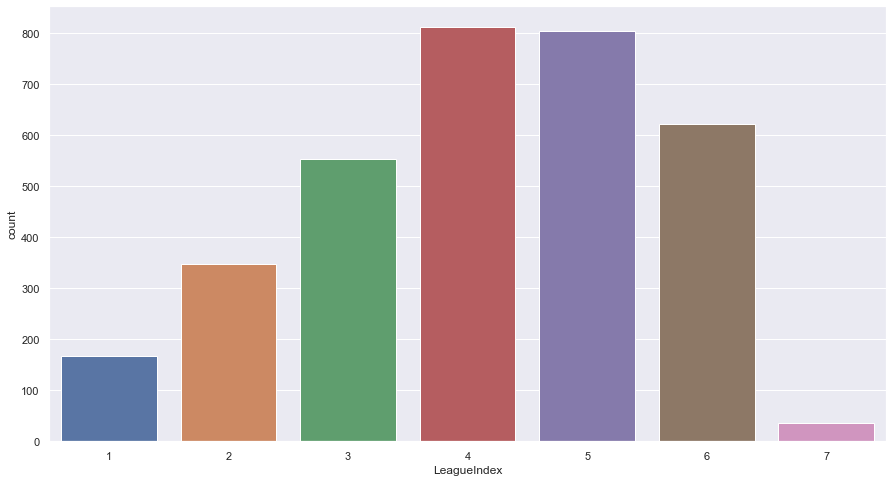

In [323]:
sns.countplot(x='LeagueIndex',data=df)

In [324]:
correlation=df.corr()
x=correlation.iloc[1].abs().sort_values(ascending=False)
x

LeagueIndex             1.000000
ActionLatency           0.659923
APM                     0.624701
NumberOfPACs            0.589180
GapBetweenPACs          0.537475
AssignToHotkeys         0.487243
SelectByHotkeys         0.428998
UniqueHotkeys           0.322383
WorkersMade             0.310380
TotalHours              0.270729
MinimapAttacks          0.270606
TotalMapExplored        0.230221
HoursPerWeek            0.217834
MinimapRightClicks      0.206359
ComplexUnitsMade        0.171304
ComplexAbilitiesUsed    0.156146
UniqueUnitsMade         0.151997
ActionsInPAC            0.140243
Age                     0.127381
GameID                  0.024946
Name: LeagueIndex, dtype: float64

We can see the most correlated variables with 'LeagueIndex'

<AxesSubplot:xlabel='LeagueIndex', ylabel='ActionLatency'>

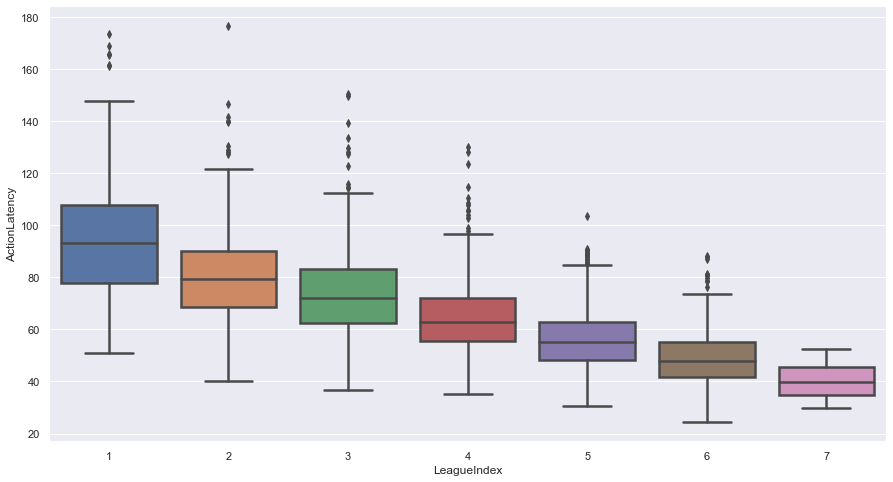

In [325]:
plt.figure(figsize=(15,8))
sns.boxplot(x="LeagueIndex",y="ActionLatency",data=df,linewidth=2.5)

<AxesSubplot:xlabel='LeagueIndex', ylabel='APM'>

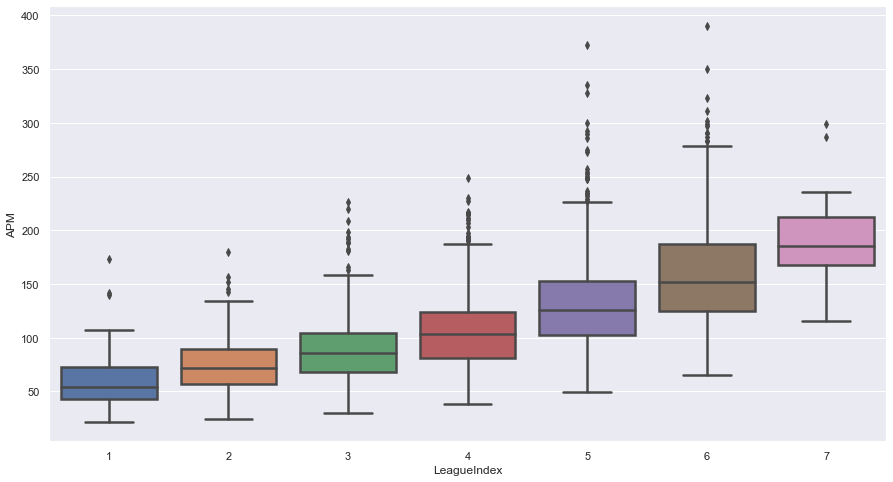

In [326]:
plt.figure(figsize=(15,8))
sns.boxplot(x="LeagueIndex",y="APM",data=df,linewidth=2.5)

<AxesSubplot:xlabel='LeagueIndex', ylabel='NumberOfPACs'>

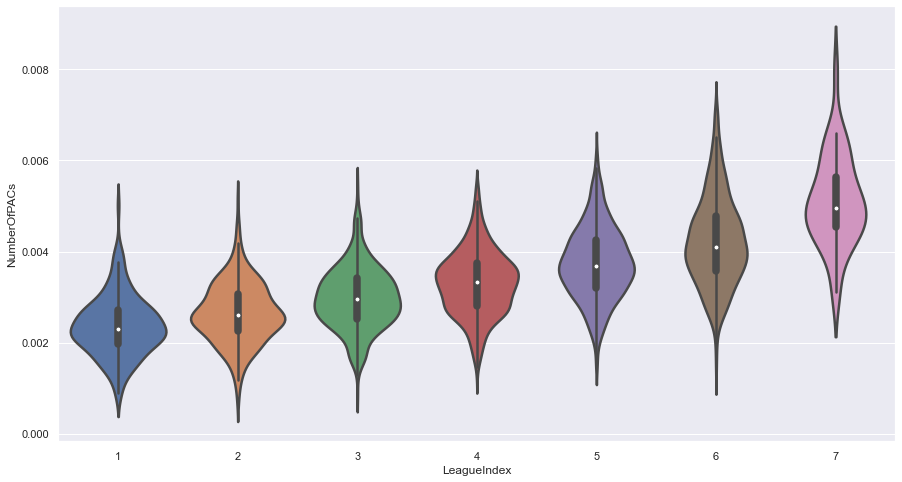

In [327]:
plt.figure(figsize=(15,8))
sns.violinplot(x="LeagueIndex",y="NumberOfPACs",data=df,linewidth=2.5)

<AxesSubplot:xlabel='LeagueIndex', ylabel='AssignToHotkeys'>

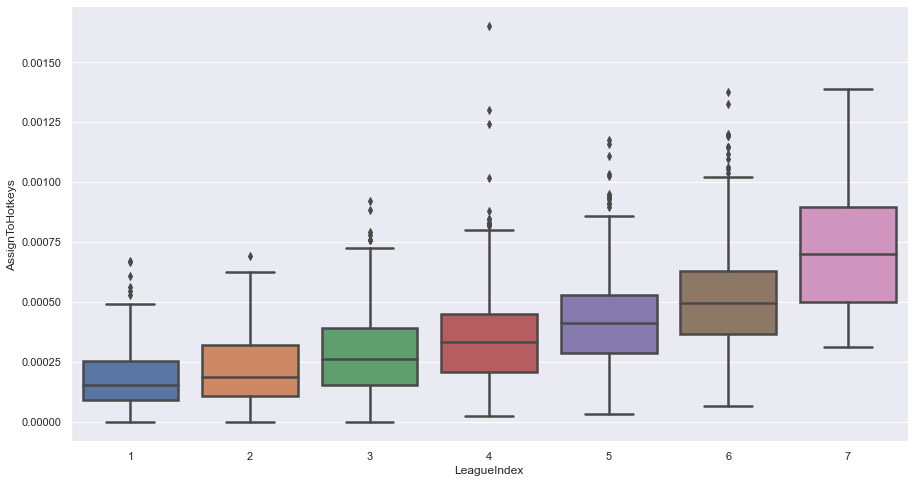

In [328]:
plt.figure(figsize=(15,8))
sns.boxplot(x="LeagueIndex",y="AssignToHotkeys",data=df,linewidth=2.5)

<AxesSubplot:xlabel='LeagueIndex', ylabel='SelectByHotkeys'>

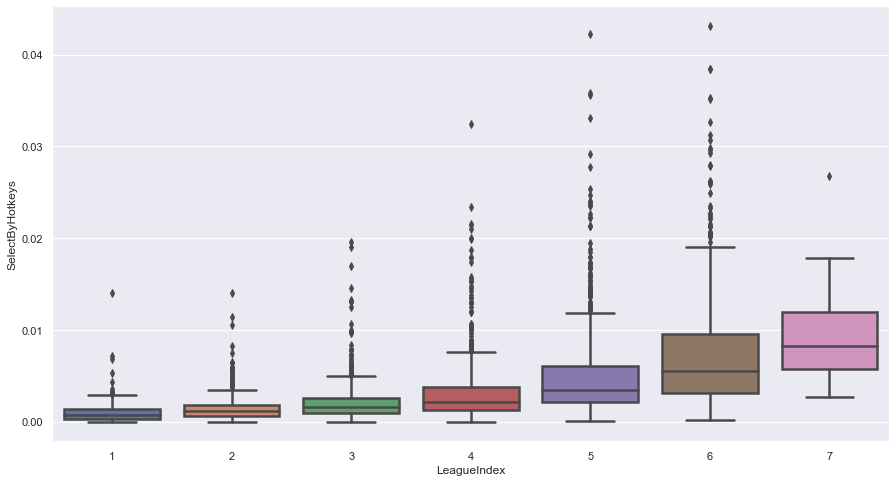

In [329]:
plt.figure(figsize=(15,8))
sns.boxplot(x="LeagueIndex",y="SelectByHotkeys",data=df,linewidth=2.5)

<AxesSubplot:xlabel='LeagueIndex', ylabel='UniqueHotkeys'>

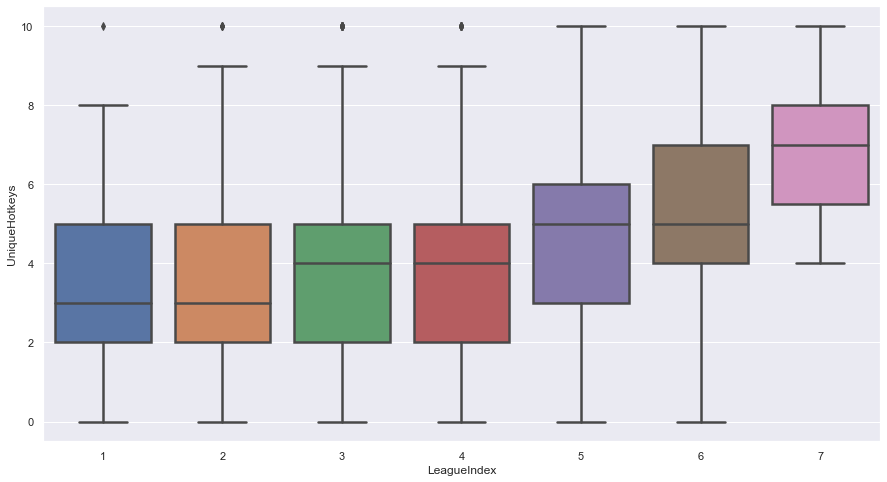

In [330]:
plt.figure(figsize=(15,8))
sns.boxplot(x="LeagueIndex",y="UniqueHotkeys",data=df,linewidth=2.5)

<AxesSubplot:xlabel='LeagueIndex', ylabel='Age'>

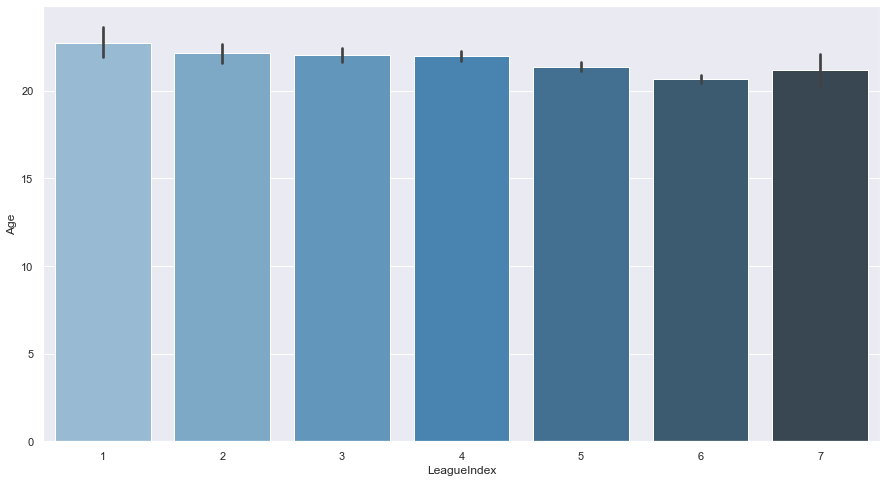

In [331]:
plt.figure(figsize=(15,8))
from numpy import mean
sns.barplot(x='LeagueIndex',y='Age',estimator=mean,data=df, palette="Blues_d")

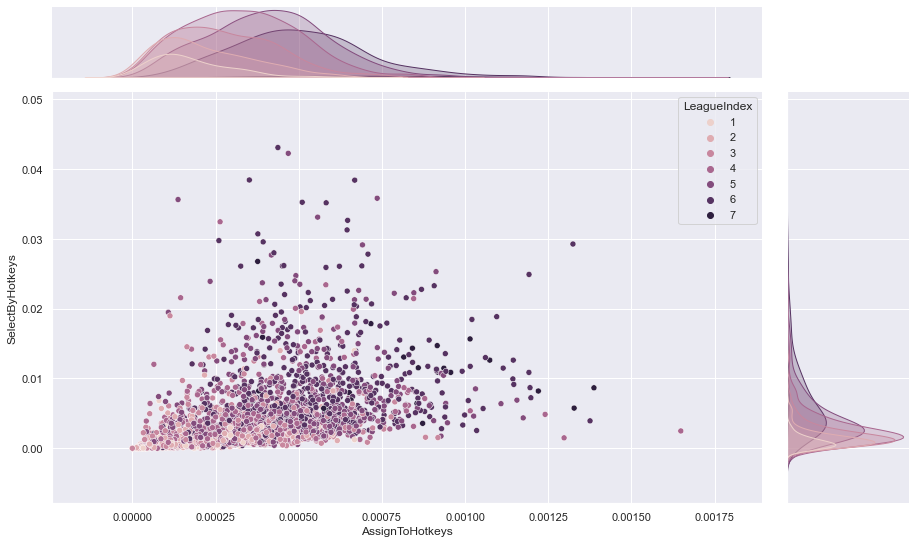

In [332]:
sns.jointplot(x='AssignToHotkeys',
              y="SelectByHotkeys",
              hue='LeagueIndex',
              #kind="kde",
              data=df).fig.set_size_inches(14,8)

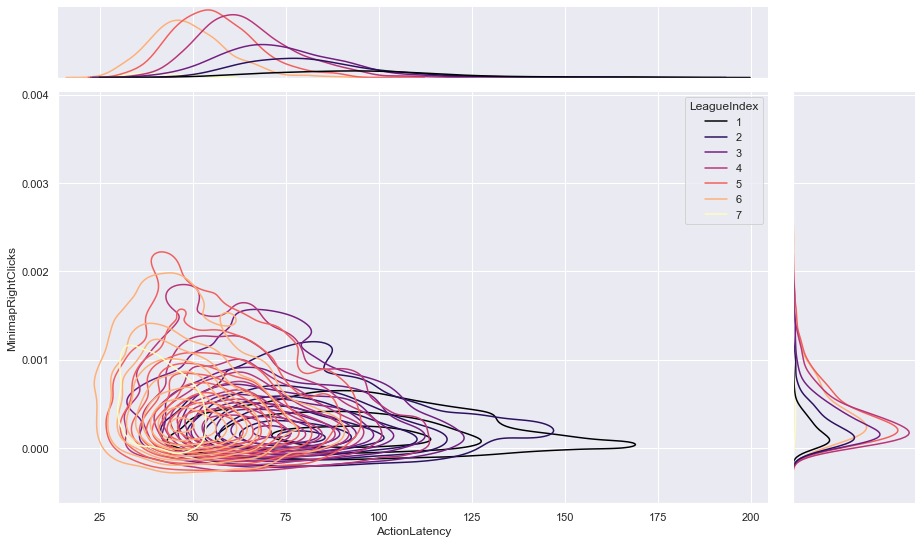

In [333]:
sns.jointplot(x='ActionLatency',
              y="MinimapRightClicks",
              hue='LeagueIndex',
              kind="kde",
              palette="magma",
              data=df).fig.set_size_inches(14,8)

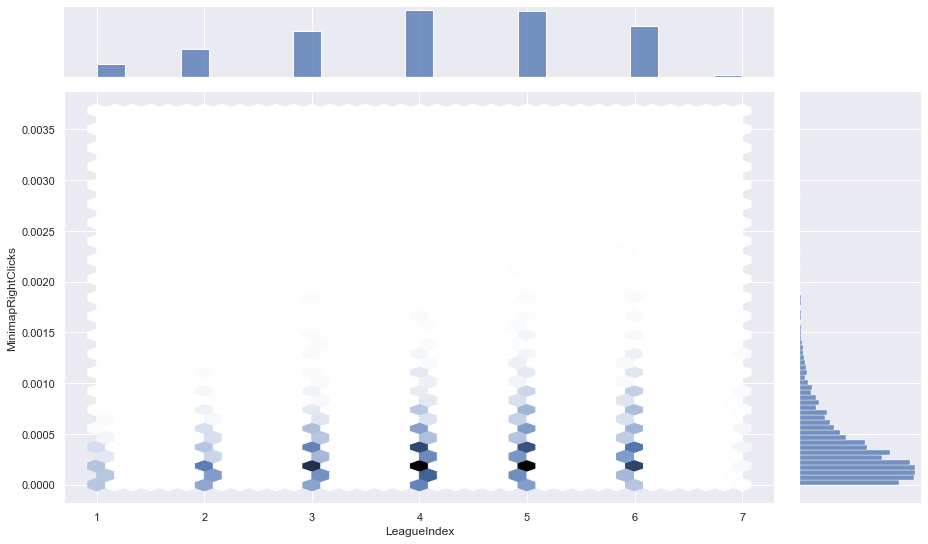

In [334]:
sns.jointplot(x='LeagueIndex',
              y="MinimapRightClicks",
              kind="hex",
              data=df).fig.set_size_inches(14,8)

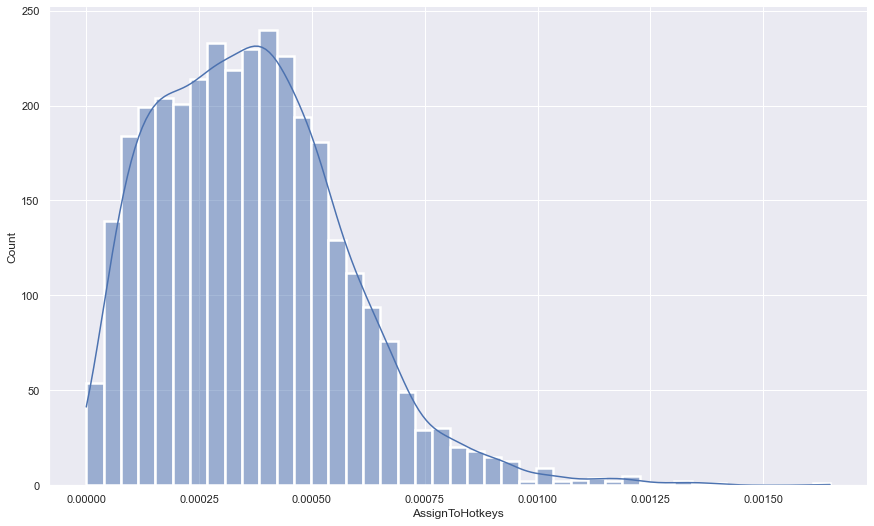

In [335]:
sns.displot(df["AssignToHotkeys"],
            #hue='LeagueIndex',
            kde=True,
            linewidth=2.5,
            #col="LeagueIndex"
           ).fig.set_size_inches(14,8)

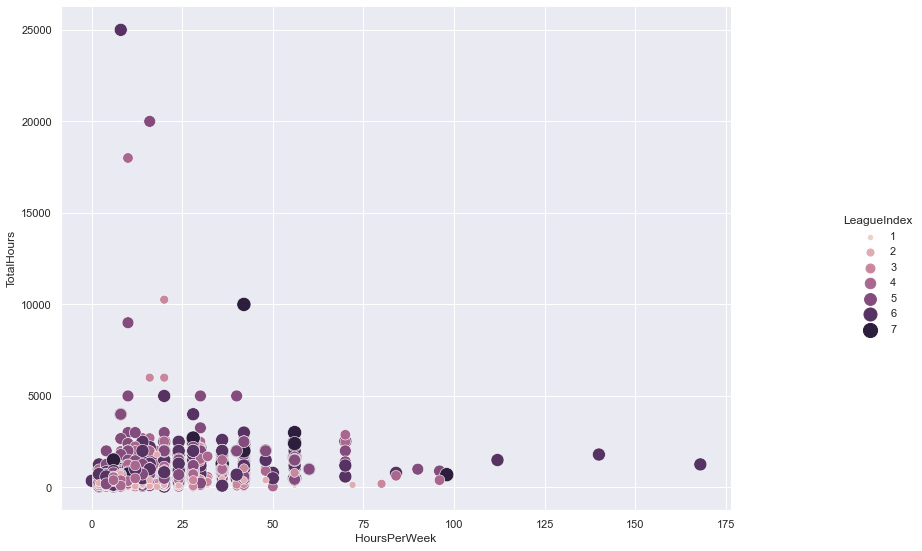

In [336]:

sns.relplot(x="HoursPerWeek",
            y="TotalHours",
            hue="LeagueIndex",
            #style="LeagueIndex",
            size="LeagueIndex",
            sizes=(20,200),
            data=df).fig.set_size_inches(14,8)

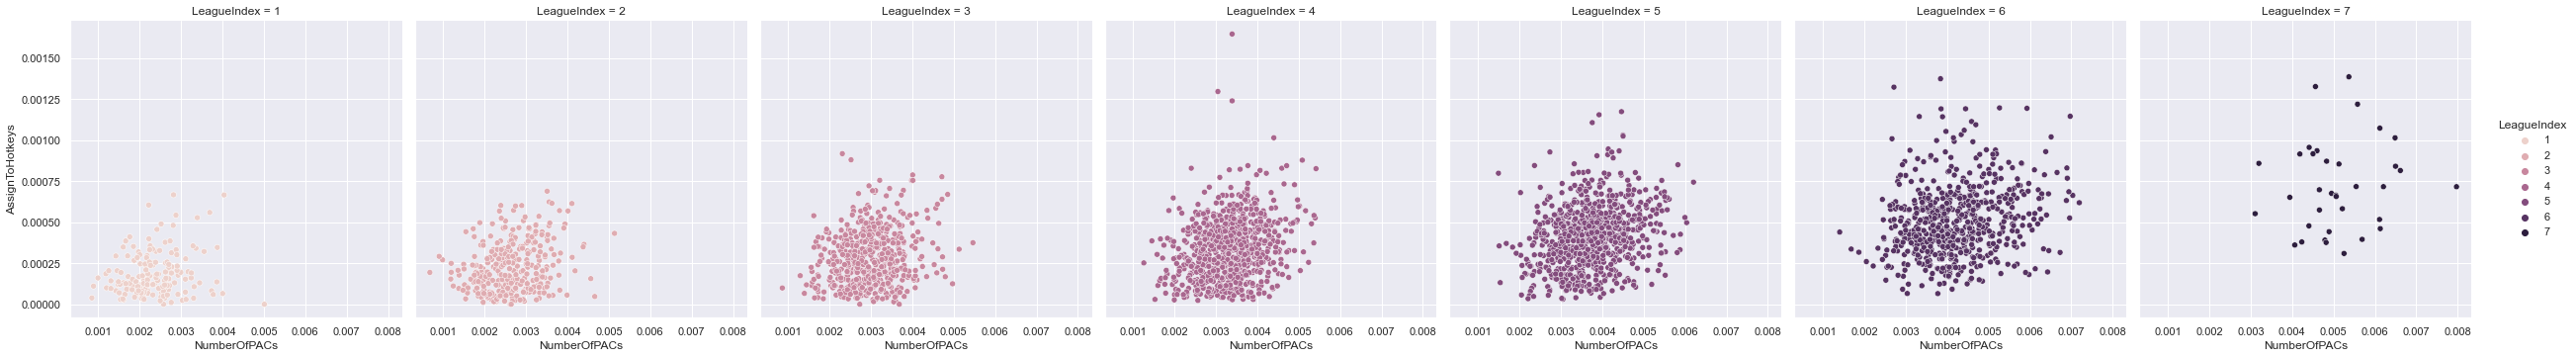

In [337]:
sns.relplot(
    data=df, x="NumberOfPACs", 
    y="AssignToHotkeys", 
    col="LeagueIndex",
    hue="LeagueIndex", 
    sizes=(10, 100)
)
#if you want to zoom, just double click on the plot

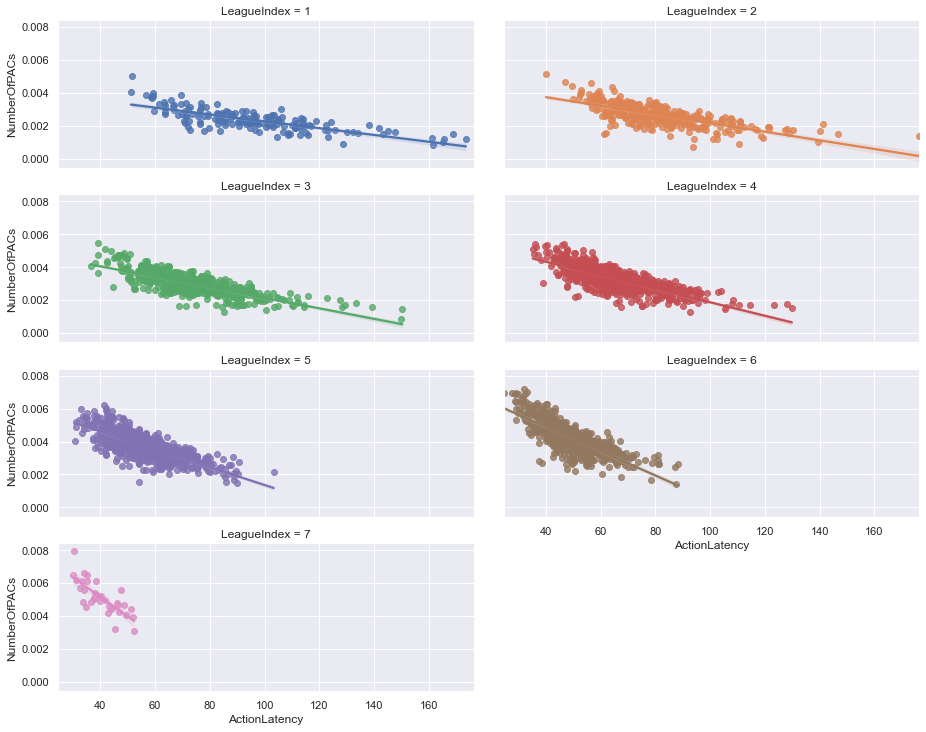

In [338]:
sns.lmplot(x="ActionLatency", 
           y="NumberOfPACs", 
           col="LeagueIndex",
           hue="LeagueIndex",
               data=df, 
           col_wrap=2, 
           height=3).fig.set_size_inches(14,10)

C:\Users\dewat\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dewat\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dewat\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 58.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dewat\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 63.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\dewat\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.4% of the points

<AxesSubplot:xlabel='LeagueIndex', ylabel='GapBetweenPACs'>

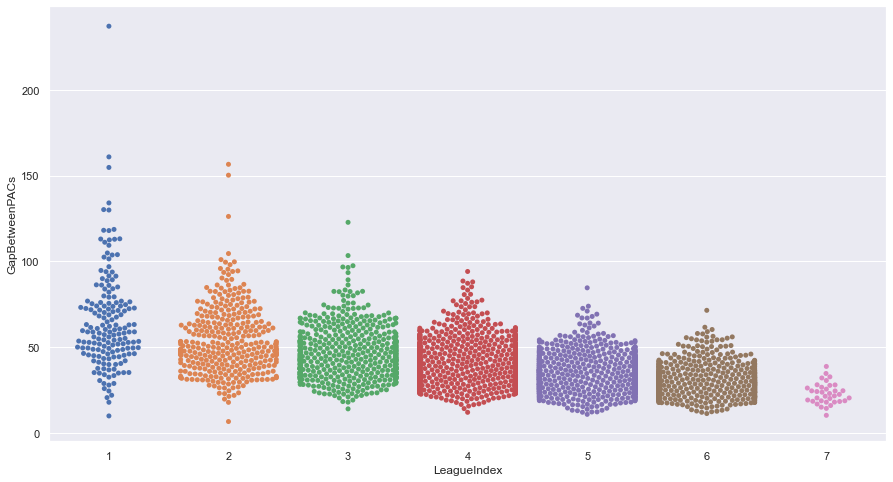

In [339]:
plt.figure(figsize=(15,8))
sns.swarmplot(x='LeagueIndex',y='GapBetweenPACs',data=df)

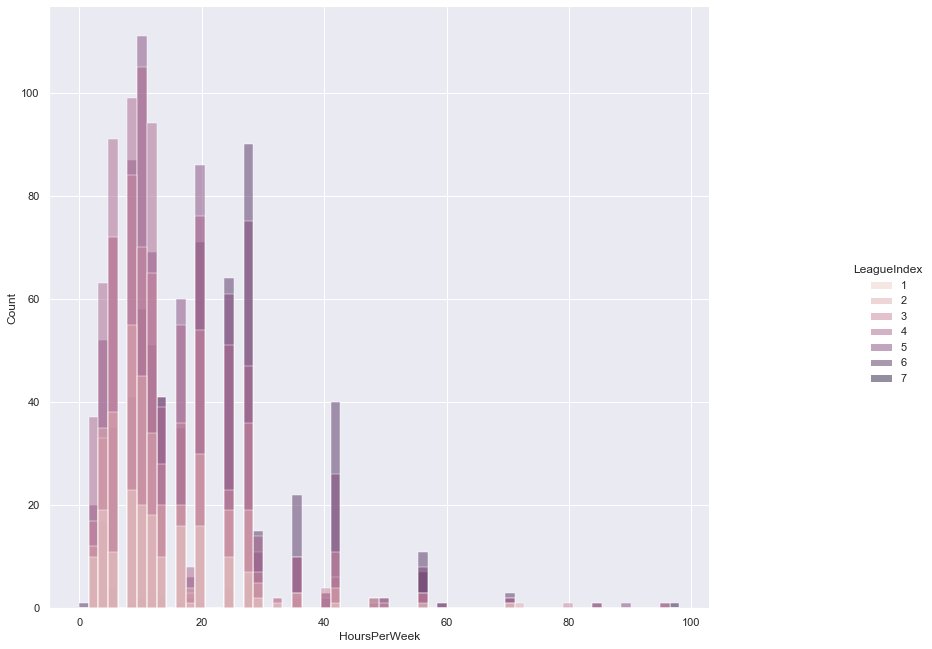

In [340]:
sns.displot(x='HoursPerWeek',
           hue='LeagueIndex',
           data=df[df["HoursPerWeek"]<100]).fig.set_size_inches(14,10)

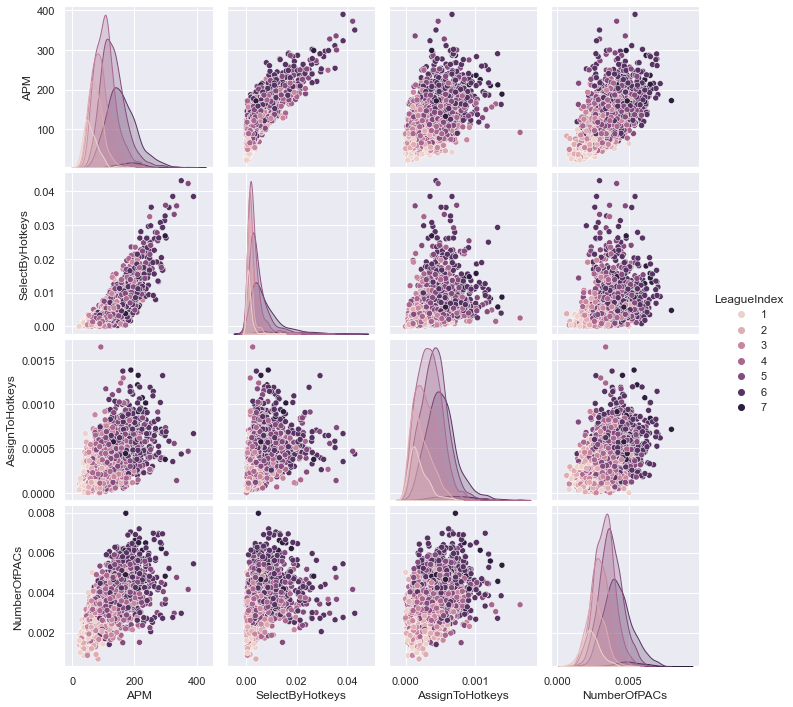

In [341]:
sns.pairplot(
    df,
    x_vars=["APM", "SelectByHotkeys", "AssignToHotkeys","NumberOfPACs"],
    y_vars=["APM", "SelectByHotkeys", "AssignToHotkeys","NumberOfPACs"],
    hue='LeagueIndex'
)

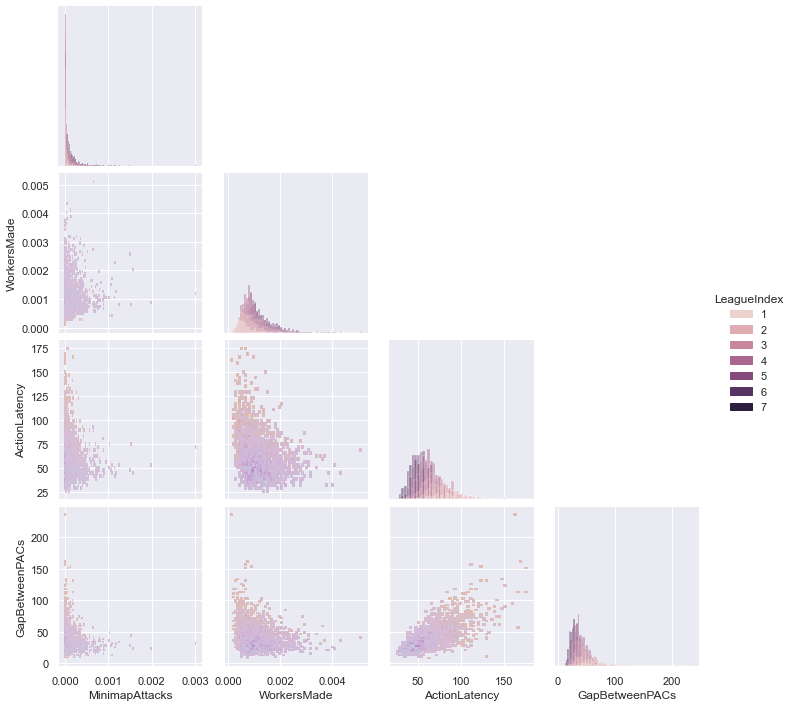

In [342]:
sns.pairplot(
    df,
    x_vars=["MinimapAttacks", "WorkersMade", "ActionLatency","GapBetweenPACs"],
    y_vars=["MinimapAttacks", "WorkersMade", "ActionLatency","GapBetweenPACs"],
    hue='LeagueIndex',
    corner=True,
    kind="hist",
    #diag_kind="hist"
)

In [343]:
allMeans=df.groupby(by="LeagueIndex").mean()
allMeans

,GameID,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
LeagueIndex,,,,,,,,,,,,,,,,,,,
1,4427.359281,22.724551,13.125749,264.191617,59.539277,0.001081,0.000185,3.215569,0.000028,0.000208,0.002363,65.654987,95.404977,4.548287,18.730539,0.000626,5.826347,0.000015,0.000042
2,4668.334294,22.155620,13.296830,331.409222,74.780917,0.001536,0.000222,3.351585,0.000045,0.000276,0.002650,53.788886,81.270053,5.005949,19.824207,0.000801,6.074928,0.000024,0.000076
3,4725.052441,22.050633,13.949367,493.792043,89.971260,0.002188,0.000282,3.687161,0.000056,0.000332,0.002976,46.143882,73.697301,5.163282,20.506329,0.000919,6.368897,0.000045,0.000117
4,4715.130703,21.981504,14.022195,588.006165,105.847166,0.003150,0.000340,3.971640,0.000075,0.000368,0.003310,41.041426,64.793765,5.236971,22.019729,0.001006,6.573366,0.000065,0.000138
5,4708.084682,21.376090,16.169365,781.684932,131.391724,0.004957,0.000413,4.703611,0.000115,0.000427,0.003742,34.719779,56.103570,5.470612,23.058531,0.001168,6.702366,0.000076,0.000176
6,4843.792271,20.677939,21.088567,988.405797,158.683211,0.007437,0.000512,5.521739,0.000156,0.000473,0.004231,30.207895,48.947837,5.475560,24.307568,0.001211,6.869565,0.000077,0.000182
7,4683.771429,21.171429,31.714286,1581.028571,189.555686,0.009418,0.000723,6.771429,0.000340,0.000570,0.005111,22.978160,40.342903,5.226089,28.028571,0.001238,7.028571,0.000082,0.000267


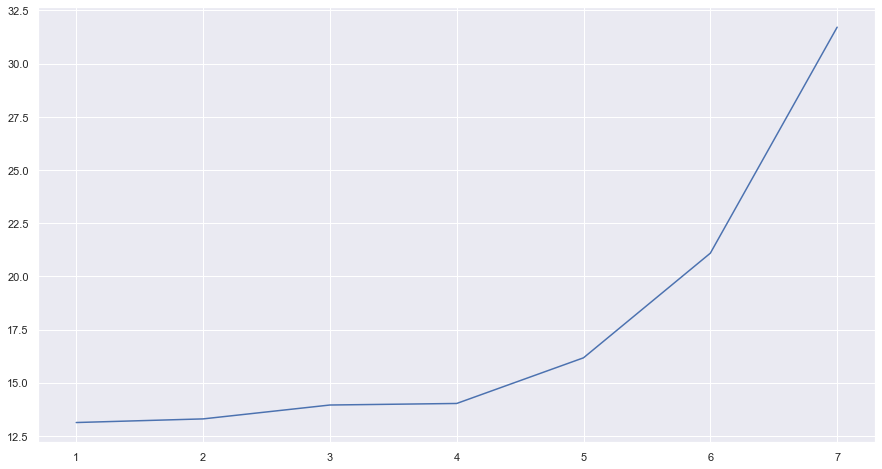

In [344]:
plt.figure(figsize=(15,8))
plt.plot(allMeans.index,allMeans["HoursPerWeek"])

<Figure size 1080x576 with 0 Axes>

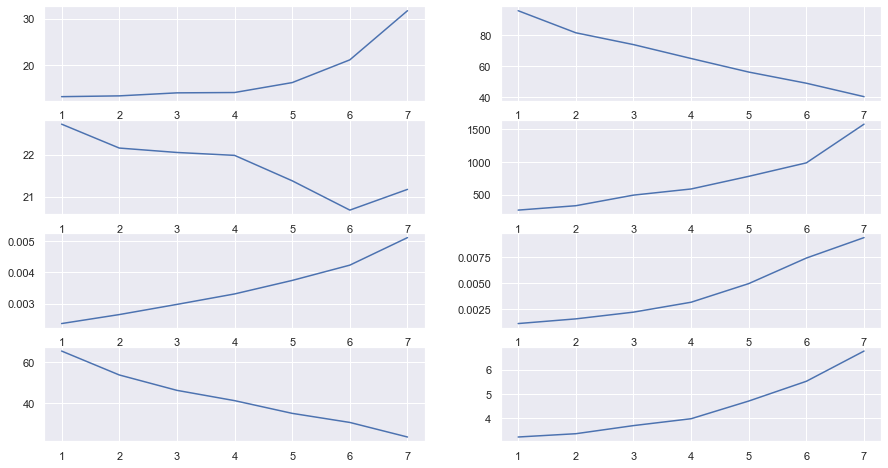

In [345]:
plt.figure(figsize=(15,8))
fig, ax = plt.subplots(4, 2,figsize=(15,8))
ax[0, 0].plot(allMeans.index,allMeans["HoursPerWeek"]) #row=0, col=0
ax[1, 0].plot(allMeans.index,allMeans["Age"]) #row=1, col=0
ax[0, 1].plot(allMeans.index,allMeans["ActionLatency"]) #row=0, col=1
ax[1, 1].plot(allMeans.index,allMeans["TotalHours"]) #row=1, col=1
ax[2, 0].plot(allMeans.index,allMeans["NumberOfPACs"]) 
ax[3, 0].plot(allMeans.index,allMeans["GapBetweenPACs"])
ax[2, 1].plot(allMeans.index,allMeans["SelectByHotkeys"]) 
ax[3, 1].plot(allMeans.index,allMeans["UniqueHotkeys"])
plt.show()

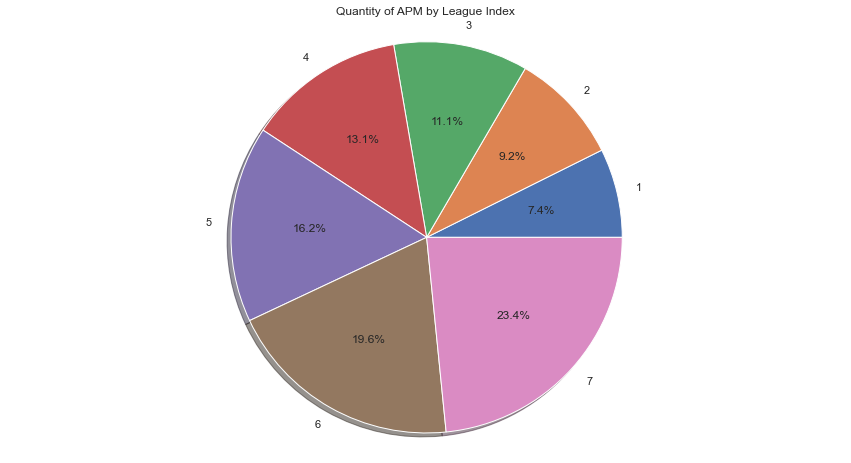

In [346]:
plt.figure(figsize=(15,8))
plt.pie(allMeans['APM'],labels=allMeans.index,autopct='%1.1f%%',shadow=True)
plt.axis('equal')
plt.title('Quantity of APM by League Index')
plt.show()

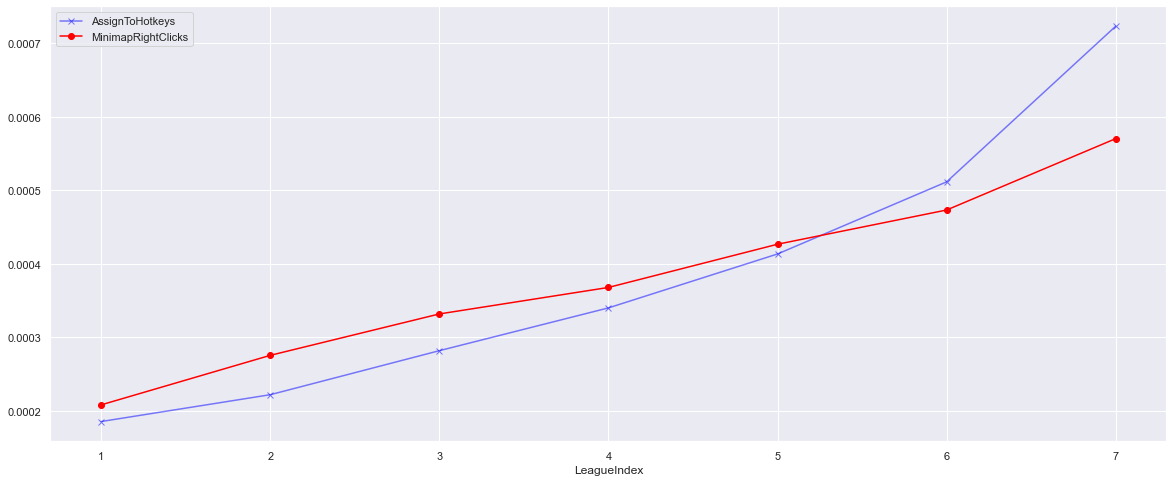

In [347]:
fig,ax=plt.subplots(figsize=(20,8))
ax.plot(allMeans.index,allMeans['AssignToHotkeys'],color="blue",alpha=0.5,marker='x',label='AssignToHotkeys')#half transparent
ax.legend()
ax.plot(allMeans.index,allMeans['MinimapRightClicks'],color="red",marker='o',label='MinimapRightClicks')
ax.legend()
plt.xlabel("LeagueIndex")
plt.show()

In [348]:
df["LeagueIndex"]=df["LeagueIndex"].replace([1,2,3,4,5,6,7],["Bronze","Silver","Gold","Platinum","Diamond","Master","GrandMaster"])

<AxesSubplot:xlabel='LeagueIndex', ylabel='count'>

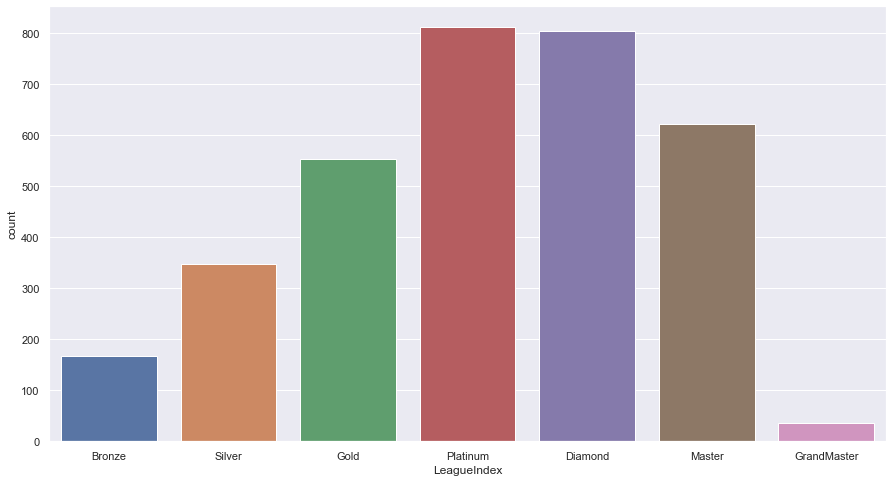

In [349]:
sns.countplot(x='LeagueIndex',data=df,order=["Bronze","Silver","Gold","Platinum","Diamond","Master","GrandMaster"])

<AxesSubplot:>

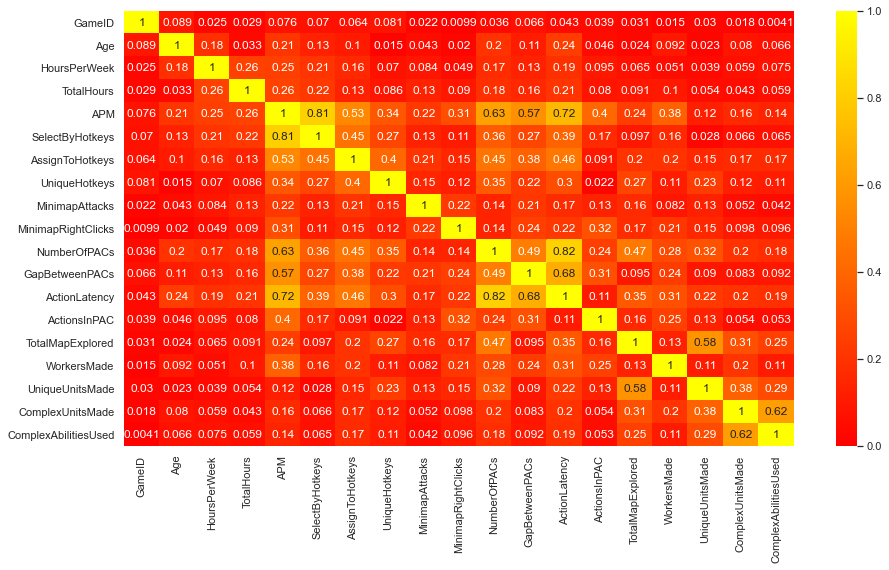

In [350]:

cor=df.corr().abs()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(cor,
            cmap='autumn',
            annot=True,
            vmax=1,
            vmin=0,
            linewidths=0,
            #cbar_kws ={"orientation":"horizontal"}
           )
                 

We just keep variables with a correlation of 0.4 or more with LeagueIndex 

In [351]:
df=df.drop([
            "GameID",
            "Age",
            "HoursPerWeek",
            "TotalHours",
            "UniqueHotkeys",
            "MinimapAttacks",
           "MinimapRightClicks",
            "ActionsInPAC",
            "TotalMapExplored",
            "WorkersMade",
            "UniqueUnitsMade",
           "ComplexUnitsMade",
            "ComplexAbilitiesUsed",
           ],axis=1)
df.head()

,LeagueIndex,APM,SelectByHotkeys,AssignToHotkeys,NumberOfPACs,GapBetweenPACs,ActionLatency
0,Diamond,143.7180,0.003515,0.000220,0.004849,32.6677,40.8673
1,Diamond,129.2322,0.003304,0.000259,0.004307,32.9194,42.3454
2,Platinum,69.9612,0.001101,0.000336,0.002926,44.6475,75.3548
3,Gold,107.6016,0.001034,0.000213,0.003783,29.2203,53.7352
4,Gold,122.8908,0.001136,0.000327,0.002368,22.6885,62.0813


<AxesSubplot:>

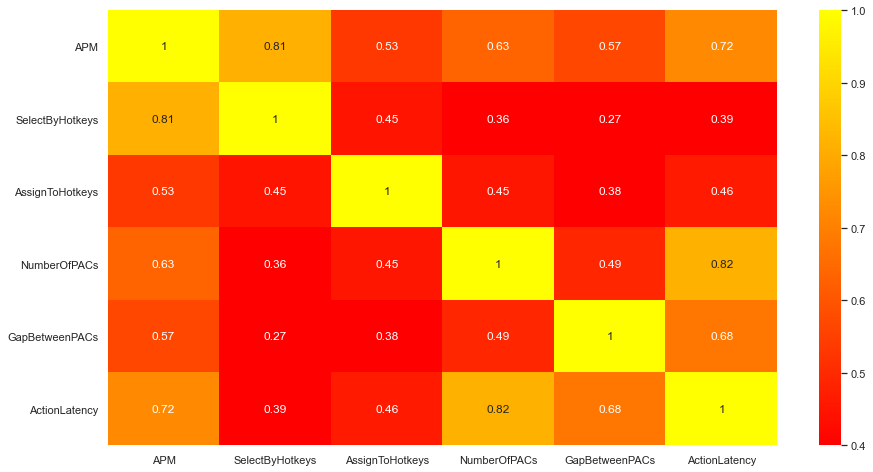

In [352]:

cor=df.corr().abs()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(cor,
            cmap='autumn',
            annot=True,
            vmax=1,
            vmin=0.4,
            linewidths=0,
            #cbar_kws ={"orientation":"horizontal"}
           )

# Our models

In [122]:
print("Before OverSampling, counts of label '2': {}".format(sum(y_train==2)))
print("Before OverSampling, counts of label '8': {} \n".format(sum(y_train==8)))
print("Before OverSampling, counts of label '5': {}".format(sum(y_train==5)))
print("Before OverSampling, counts of label '6': {} \n".format(sum(y_train==6)))

Before OverSampling, counts of label '2': 336
Before OverSampling, counts of label '8': 0 

Before OverSampling, counts of label '5': 553
Before OverSampling, counts of label '6': 518 



In [33]:
#pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [123]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

In [125]:
print("After OverSampling, counts of label '2': {}".format(sum(y_train==2)))
print("After OverSampling, counts of label '8': {} ".format(sum(y_train==8)))
print("After OverSampling, counts of label '5': {}".format(sum(y_train==5)))
print("After OverSampling, counts of label '6': {} ".format(sum(y_train==6)))

After OverSampling, counts of label '2': 562
After OverSampling, counts of label '8': 0 
After OverSampling, counts of label '5': 562
After OverSampling, counts of label '6': 562 


In [353]:
X=df.iloc[:,1:].values
y=df.iloc[:,0].values
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3)

In [354]:


#X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3)
scaler= StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

scaler2=MinMaxScaler()
scaler2.fit(X_train)
X_train2 = scaler2.fit_transform(X_train)
X_test2 = scaler2.transform(X_test)

scaler3=RobustScaler()
scaler3.fit(X_train)
X_train3 = scaler3.fit_transform(X_train)
X_test3 = scaler3.transform(X_test)

scaler4=MaxAbsScaler()
scaler4.fit(X_train)
X_train4 = scaler4.fit_transform(X_train)
X_test4 = scaler4.transform(X_test)

scaler5=Normalizer()
scaler5.fit(X_train)
X_train5 = scaler5.fit_transform(X_train)
X_test5 = scaler5.transform(X_test)

In [355]:
def bestPara(params,model,X,Y):
    grid=GridSearchCV(model,params,n_jobs=-1,cv=5,verbose=1)
    grid.fit(X,Y)
    print('Score : ',grid.best_score_*100,'%')
    print('Best estimator : ',grid.best_estimator_)
    return grid

def resultsClassification(model,X_train,Y_train,X_test,Y_test):
    model.fit(X_train,Y_train)
    y_pred = model.predict(X_test)
    log = accuracy_score(Y_test,y_pred)*100
    print("Accuracy Score:",accuracy_score(Y_test,y_pred)*100,"%")
    print(pd.crosstab(y_pred,Y_test))
    print(classification_report(Y_test,y_pred))
    
acc_dict={}

In [356]:
parameters = {
                'priors':[None],
                'var_smoothing':[1e-09]
}
grid=bestPara(parameters,GaussianNB(),X_train,y_train)
acc_dict["GaussianNB"]=grid.best_score_*100

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Score :  36.70235546038544 %
Best estimator :  GaussianNB()


In [189]:
parameters={
            #'splitter':["best","random"],
            'max_depth':[4,5,6,7,8,9,10],
            "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
            "min_weight_fraction_leaf":[0.1,0.2],
            "max_features":["auto","log2","sqrt",None],
            "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] 
           }
grid=bestPara(parameters,DecisionTreeClassifier(),X_train,y_train)
acc_dict["DecisionTreeClassifier"]=grid.best_score_*100

Fitting 5 folds for each of 5600 candidates, totalling 28000 fits


KeyboardInterrupt: 

exception calling callback for <Future at 0x10887cb3d60 state=finished returned list>
Traceback (most recent call last):
  File "C:\Users\dewat\anaconda3\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "C:\Users\dewat\anaconda3\lib\site-packages\joblib\parallel.py", line 359, in __call__
    self.parallel.dispatch_next()
  File "C:\Users\dewat\anaconda3\lib\site-packages\joblib\parallel.py", line 792, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "C:\Users\dewat\anaconda3\lib\site-packages\joblib\parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\dewat\anaconda3\lib\site-packages\joblib\parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\dewat\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 531, in apply_async
    future = self._workers.submit(SafeFunction(func))
AttributeError:

In [297]:
parameters = {
           'reg_param': [0.65,0.735,0.74],
            'store_covariance':[True,False]
}
grid=bestPara(parameters,QuadraticDiscriminantAnalysis(),X_train,y_train)
acc_dict["QuadraticDiscriminantAnalysis"]=grid.best_score_*100

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Score :  77.47323340471092 %
Best estimator :  QuadraticDiscriminantAnalysis(reg_param=0.74, store_covariance=True)


In [293]:
parameters = {
                'solver': ['svd', 'lsqr', 'eigen'],
                'shrinkage':['auto',None]
            }
grid=bestPara(parameters,LinearDiscriminantAnalysis(),X_train,y_train)
acc_dict["LinearDiscriminantAnalysis"]=grid.best_score_*100

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Score :  77.7730192719486 %
Best estimator :  LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')


C:\Users\dewat\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.77773019 0.77773019 0.77730193 0.77730193 0.77730193]
  warnings.warn(


In [72]:
clf=LogisticRegression()
ada = AdaBoostClassifier(clf)
parameters = {'base_estimator__C' :[0.6],
              'n_estimators' :[ 20],
              #'learning_rate' :[0.0001, 0.001, 0.01, 0.1, 1]
             }
grid=bestPara(parameters,ada,X_train,y_train)
acc_dict["AdaBoost"]=grid.best_score_*100

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Score :  39.07368421052632 %
Best estimator :  AdaBoostClassifier(base_estimator=LogisticRegression(C=0.6), n_estimators=20)


In [235]:
parameters={
            'weights':['uniform','distance'],
            'metric' : ['manhattan','euclidean','minkowski'],
            'leaf_size': [1], 
            'n_neighbors': list(range(1,20)), 
            'p': [1, 2]
           }
grid=bestPara(parameters,KNeighborsClassifier(),X_train3,y_train)
acc_dict["KNeighborsClassifier"]=grid.best_score_*100

Fitting 5 folds for each of 228 candidates, totalling 1140 fits
Score :  41.927194860813714 %
Best estimator :  KNeighborsClassifier(leaf_size=1, metric='manhattan', n_neighbors=17, p=1)


In [294]:
parameters = {
                'C': [0.1,1, 10, 100], 
                'gamma': [1,0.1,0.01,0.001],
                'kernel': ['rbf', 'poly', 'sigmoid'],
                'gamma':['scale','auto']
            }
grid=bestPara(parameters,SVC(),X_train,y_train)
acc_dict["SVC"]=grid.best_score_*100

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Score :  77.64453961456101 %
Best estimator :  SVC(C=0.1)


In [194]:
parameters={
            'n_estimators': [10,15,20, 25], 
            'max_features': [3,4,5,6], 
            'max_depth': [60,65, None], 
            #'bootstrap': [True, False],
            #'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [4, 5, 6]
           }
grid=bestPara(parameters,RandomForestClassifier(),X_train,y_train)
acc_dict["RandomForestClassifier"]=grid.best_score_*100

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Score :  77.04496788008566 %
Best estimator :  RandomForestClassifier(max_features=6, min_samples_split=6, n_estimators=20)


In [295]:

parameters={
            'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'penalty' : ['l2','l1', 'elasticnet', 'none'],
            'C' : [100, 10, 1.0,8],
            'class_weight':[None,'balanced'],
            #'fit_intercept':[True,False],
            #'multi_class':['auto', 'ovr', 'multinomial']
           }
grid=bestPara(parameters,LogisticRegression(),X_train2,y_train)
acc_dict["LogisticRegression"]=grid.best_score_*100

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Score :  77.98715203426123 %
Best estimator :  LogisticRegression(solver='liblinear')


C:\Users\dewat\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.77815846 0.77815846 0.77815846 0.77815846 0.77815846        nan
        nan 0.77858672        nan 0.77858672        nan        nan
        nan        nan        nan 0.77901499 0.77901499        nan
 0.77944325 0.77858672 0.77130621 0.77130621 0.77130621 0.77130621
 0.77130621        nan        nan 0.77173448        nan 0.77173448
        nan        nan        nan        nan        nan 0.77173448
 0.77173448        nan 0.77173448 0.77173448 0.77773019 0.77773019
 0.77773019 0.77773019 0.77773019        nan        nan 0.77815846
        nan 0.77815846        nan        nan        nan        nan
        nan 0.77901499 0.77901499        nan 0.77901499 0.77858672
 0.76959315 0.76959315 0.76959315 0.76959315 0.76959315        nan
        nan 0.77087794        nan 0.77173448        nan        nan
        nan        nan        nan 0.77173448 0.771734

In [86]:
#GradientBoostingClassifier(n_estimators=100,random_state=SEED,verbose=1)
parameters={
            #'loss':['deviance','exponential'],
            #'criterion':['friedman_mse', 'squared_error', 'mse', 'mae'],
            'max_depth':[1,3,5],
            #'max_features':['auto', 'sqrt', 'log2'],
            'min_samples_leaf':[1,2,3]
}

grid=bestPara(parameters,GradientBoostingClassifier(),X_train,y_train)
acc_dict["GradientBoostingClassifier"]=grid.best_score_*100

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Score :  40.21052631578947 %
Best estimator :  GradientBoostingClassifier(max_depth=5, min_samples_leaf=3)


<AxesSubplot:title={'center':'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

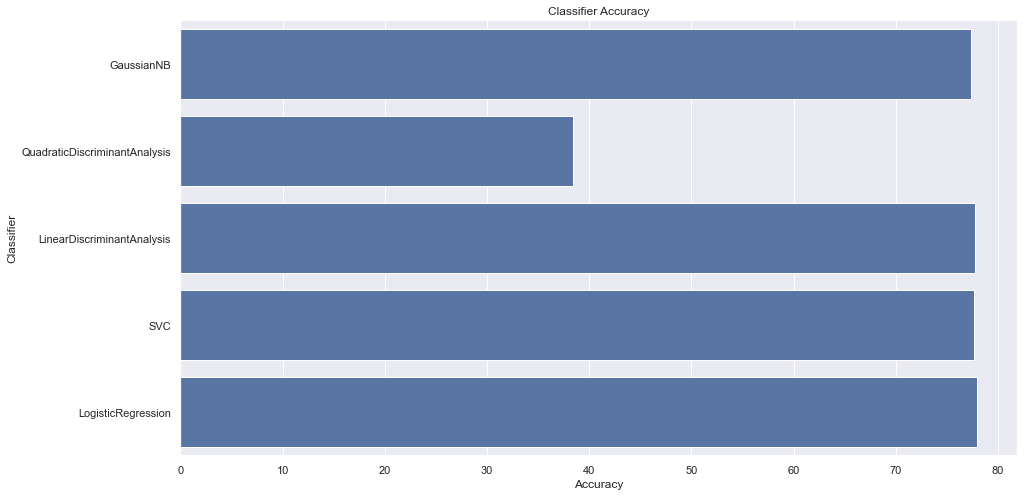

In [296]:
result_models=pd.DataFrame(list(acc_dict.items()),columns=['Classifier', 'Accuracy'])
plt.title('Classifier Accuracy')
sns.barplot(x='Accuracy', y='Classifier', data=result_models, color="b")

In [134]:
resultsClassification(LogisticRegression(class_weight='balanced', penalty='l1', solver='saga')
                      ,X_train2,y_train,X_test2,y_test)

Accuracy Score: 43.47399411187439 %
col_0    2   3   4   5    6
row_0                      
2      118  48  43  12    0
3       36  44  52  22    5
4       15  33  73  48   15
5        6  20  60  80   45
6        3   2  21  90  128
              precision    recall  f1-score   support

           2       0.53      0.66      0.59       178
           3       0.28      0.30      0.29       147
           4       0.40      0.29      0.34       249
           5       0.38      0.32      0.35       252
           6       0.52      0.66      0.59       193

    accuracy                           0.43      1019
   macro avg       0.42      0.45      0.43      1019
weighted avg       0.42      0.43      0.42      1019



### With just 2 classes

In [287]:
df["LeagueIndex"]=df["LeagueIndex"].replace(["Bronze","Silver","Gold","Platinum","Diamond","Master","GrandMaster"],["Low","Low","Low","Low","High","High","High"])

<AxesSubplot:xlabel='LeagueIndex', ylabel='count'>

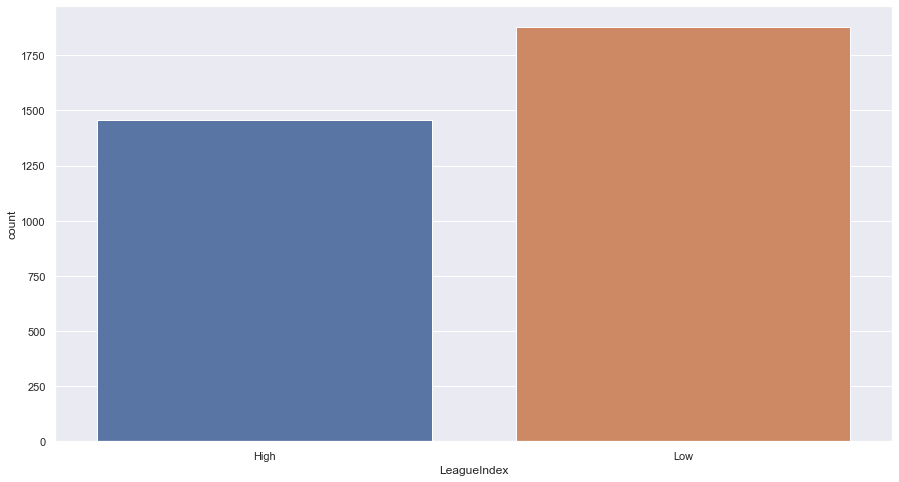

In [288]:
sns.countplot(x='LeagueIndex',data=df)